Epoch 1/100
 - 0s - loss: 2.4307 - mean_absolute_error: 1.2416
Epoch 2/100
 - 0s - loss: 1.2869 - mean_absolute_error: 0.9151
Epoch 3/100
 - 0s - loss: 1.0830 - mean_absolute_error: 0.8400
Epoch 4/100
 - 0s - loss: 0.9631 - mean_absolute_error: 0.7878
Epoch 5/100
 - 0s - loss: 0.8965 - mean_absolute_error: 0.7599
Epoch 6/100
 - 0s - loss: 0.8460 - mean_absolute_error: 0.7362
Epoch 7/100
 - 0s - loss: 0.8111 - mean_absolute_error: 0.7205
Epoch 8/100
 - 0s - loss: 0.7735 - mean_absolute_error: 0.6992
Epoch 9/100
 - 0s - loss: 0.7398 - mean_absolute_error: 0.6810
Epoch 10/100
 - 0s - loss: 0.7181 - mean_absolute_error: 0.6709
Epoch 11/100
 - 0s - loss: 0.6901 - mean_absolute_error: 0.6553
Epoch 12/100
 - 0s - loss: 0.6758 - mean_absolute_error: 0.6487
Epoch 13/100
 - 0s - loss: 0.6776 - mean_absolute_error: 0.6459
Epoch 14/100
 - 0s - loss: 0.6477 - mean_absolute_error: 0.6321
Epoch 15/100
 - 0s - loss: 0.6430 - mean_absolute_error: 0.6291
Epoch 16/100
 - 0s - loss: 0.6299 - mean_absolute

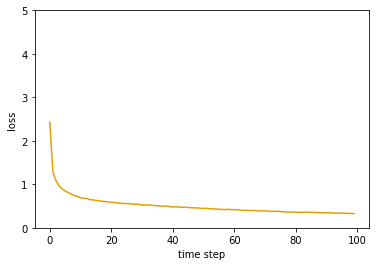

TEST RMSE: 0.47


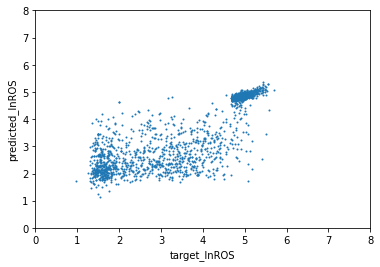

TEST RMSE: 0.75


In [3]:
# -*- coding: utf-8 -*-
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

#model name
savefile = "ROS_all_data.h5"
#file name
name = "teiROS_all_data"

# load of data
data_set = pd.read_csv(name + ".csv",sep=",",header=0)

#separation of input(x) and target(y)
x1 = pd.DataFrame(data_set.drop("quality",axis=1))


#SMOTE
#Extract evaluation value
yQ = pd.DataFrame(data_set["quality"])

sm = SMOTE(random_state=42)

#Amplify  minority data to the same number as the majority data
X_res, Y_res = sm.fit_sample(x1, yQ["quality"])

#Exclude the objective variable lnROS from the explanatory variables
x = pd.DataFrame(X_res.drop("lnROS",axis=1))
y = pd.DataFrame(X_res["lnROS"])


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=50)

# standardization of x
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)


# input and output for keras
x_train = x_train.astype(np.float)

# number,dimensio,class_number
(n_samples, n_features) = x_train.shape

# 4 layers
model = Sequential()
# input layer
model.add(Dense(units=128, activation='relu', input_shape=(n_features,)))
# Dropout
model.add(Dropout(0.1))

# second layer
model.add(Dense(units=64, activation='relu'))
# Dropout
model.add(Dropout(0.1))

# third layer
model.add(Dense(units=32, activation='relu'))
# Dropout
model.add(Dropout(0.1))

# output layer
model.add(Dense(1))
model.summary

# compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# learning
history = model.fit(x_train, y_train , epochs=100, batch_size=128, verbose=2,)

# save model
model.save_weights(savefile)

#loss_graph
plt.xlabel('time step')
plt.ylabel('loss')
plt.ylim(0,5)
loss, = plt.plot(history.history['loss'], c='#E69F00')
plt.show()

y_train_pred = model.predict(x_train, verbose=0)

train_mse = mean_squared_error(y_train, y_train_pred)

print("TRAIN RMSE: %.2f" %(train_mse**0.5))

# Verify
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test, verbose=0)

test_mse = mean_squared_error(y_test,y_pred)

#result output
y_test = np.array(y_test)
data1 = np.c_[y_test, y_pred]
data1 = pd.DataFrame(data1)
np.savetxt('out_' + name + '.csv', data1, delimiter=',')

plt.xlabel('target_lnROS')
plt.ylabel('predicted_lnROS')
plt.xlim(0,8)
plt.ylim(0,8)
plt.scatter(y_test,y_pred,s=1)
plt.show()

print("TEST RMSE: %.2f" %(test_mse**0.5))
